In [1]:
from models import Vestas_Report; from pathlib import Path

folder_path = Path("data") / "input"
file_name = 'vestas_report_example.pdf'
file_path = Path(folder_path) / file_name

/home/utilisateur/Projets/pdf_transformation/venv/lib/python3.11/site-packages/pypdf/_crypt_providers/_cryptography.py:32: CryptographyDeprecationWarning: ARC4 has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.ARC4 and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  from cryptography.hazmat.primitives.ciphers.algorithms import AES, ARC4


In [2]:
vestas_report = Vestas_Report(file_path)

In [3]:
vestas_report.get_header_informations()

{'turbine_number': '232',
 'service_order': '6114',
 'pad_no': 'HOU',
 'turbine_type': 'V136',
 'start_date': '17.10.2023',
 'end_date': '17.10.2023',
 'customer_address': ['ENERGIE'],
 'date_and_time_of_receipt': '19.03.2023 22:15:02',
 'reason_for_call_out': 'Check ICPE Electrical V136'}

In [4]:
import pandas as pd; pd.set_option('display.max_rows', None); pd.set_option('display.max_columns', None); pd.set_option('display.width', None); pd.set_option('display.max_colwidth', None) 

full_table=vestas_report._extract_full_table() 

In [5]:
full_table

,0,1,2
0,0010,Check ICPE Electrical V112-3MW,
1,0,eSIF,
2,0.01,0. DMS: 0093-0083 V03,
3,1,Safety,
4,1.01,Two persons present.,OK
5,1.02,Trained in and aware of the contents of the Vestas Corporate OH and SManual including ‘Working with Hazardous Materials’ and Safety,OK
6,,Regulations for Operators and Technicians.,
7,1.03,"Be sure to know the general recommendations regarding the followingpoints: For safety reasons, note the location of the emergency stop",OK
8,,buttons. Please refer to documentation “Safety Regulations forOperators and Technicians” of the corresponding turbine platform.,
9,1.04,Locking of rotor/blades.,OK


In [6]:
formatted_table = vestas_report.format_table(full_table)

In [7]:
formatted_table

,item_number,inspection_detail,status
0,0010,Check ICPE Electrical V112-3MW,
1,0,eSIF,
2,0.01,0. DMS: 0093-0083 V03,
3,1,Safety,
4,1.01,Two persons present.,OK
5,1.02,Trained in and aware of the contents of the Vestas Corporate OH and SManual including ‘Working with Hazardous Materials’ and Safety Regulations for Operators and Technicians.,OK
7,1.03,"Be sure to know the general recommendations regarding the followingpoints: For safety reasons, note the location of the emergency stop buttons. Please refer to documentation “Safety Regulations forOperators and Technicians” of the corresponding turbine platform.",OK
9,1.04,Locking of rotor/blades.,OK
10,1.05,Hearing protection.,OK
11,1.06,Hydraulic tools.,OK


In [8]:
output_path = Path("data") / "output"

vestas_report.save_inspection_data(formatted_table, output_path)

<Figure size 1200x1600 with 0 Axes>

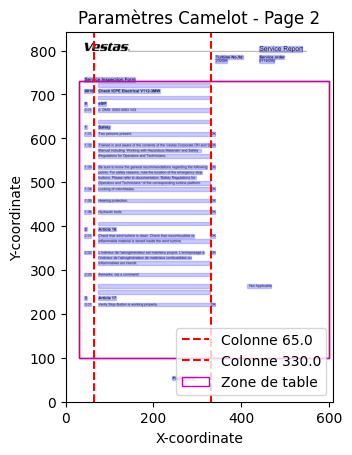

In [9]:
vestas_report.visualize_extraction_parameters(page_number=2)